# 图像特效-八方向浮雕

In [1]:
from scipy import signal
import numpy as np
import cv2
%matplotlib inline
import matplotlib.pyplot as plt
from numpy.lib.function_base import histogram

In [2]:
src = cv2.imread('../datas/f2.jpg')
gray = cv2.imread('../datas/f2.jpg',0)
rgb = cv2.cvtColor(src,cv2.COLOR_BGR2RGB)

In [15]:
directions = ['N','NE','E','SE','S','SW','W','NW']
def emboss_with_direction(src,direction='SE',offset=127):
    srcf = src.astype(np.float32)
    dst = np.zeros_like(srcf)
    ioffset = 0
    joffset = 0
    if direction == 'N':
        ioffset = -1
        joffset = 0
    elif direction == 'NE':
        ioffset = -1
        joffset = 1
    elif direction == 'E':
        ioffset = 0
        joffset = 1
    elif direction == 'SE':
        ioffset = 1
        joffset = 1
    elif direction == 'S':
        ioffset = 1
        joffset = 0
    elif direction == 'SW':
        ioffset = 1
        joffset = -1
    elif direction == 'W':
        ioffset = 0
        joffset = -1
    elif direction == 'NW':
        ioffset = -1
        joffset = -1
    else:
        ioffset = 1
        joffset = 1
    rows,cols = srcf.shape[0],srcf.shape[1]
    idx = np.arange(1,cols)
    idy = np.arange(1,rows)
    
    idx_pre = idx - ioffset
    idy_pre = idy - joffset
    
    idx = idx.reshape((cols-1,1))
    idy = idy.reshape((1,rows-1))
    
    idx_pre = idx_pre.reshape(idx.shape)
    idy_pre = idy_pre.reshape(idy.shape)
    
    idx_pre[idx_pre >= cols] = cols-1
    idy_pre[idy_pre >= rows] = rows-1

    diff = srcf[idy,idx] - srcf[idy_pre,idx_pre] + offset
    diff[diff < 0] = np.abs(diff[diff < 0])
    diff[diff < 64] = 64
    diff[diff > 255] = 255
    
    return diff.astype(np.uint8)
    

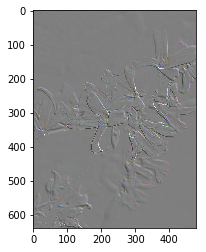

In [18]:
dst = emboss_with_direction(rgb,direction='SW')
plt.imshow(dst)